# VISUALISING PCA AND TSNE PLOTS

In [98]:
# Import our relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


In [99]:
data = pd.read_csv("BreastCancerDetection.csv")

# Drop the id column
data = data.drop('id', axis=1)
# Convert the diagnosis column to numeric format
data['diagnosis'] = data['diagnosis'].factorize()[0]
# Fill all Null values with zero
data = data.fillna(value=0)
# Store the diagnosis column in a target object and then drop it
target = data['diagnosis']
data = data.drop('diagnosis', axis=1)

In [100]:
data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [101]:
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.manifold import TSNE # TSNE module

In [102]:
# Turn dataframe into arrays
X = data.values

# Invoke the PCA method. Since this is a binary classification problem
# let's call n_components = 2
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(X)

# Invoke the TSNE method
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.002s...
[t-SNE] Computed neighbors for 569 samples in 0.031s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 33.679708
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.879795
[t-SNE] KL divergence after 2000 iterations: 0.208738


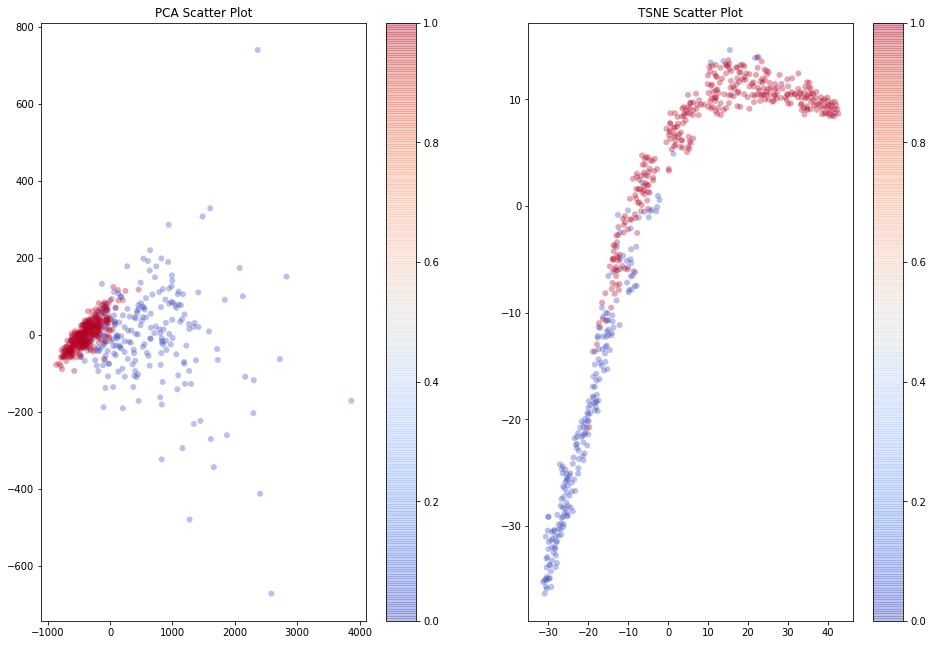

In [103]:
# Plot the TSNE and PCA visuals side-by-side
plt.figure(figsize = (16,11))
plt.subplot(121)
plt.scatter(pca_2d[:,0],pca_2d[:,1], c = target, 
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('PCA Scatter Plot')
plt.subplot(122)
plt.scatter(tsne_results[:,0],tsne_results[:,1],  c = target, 
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('TSNE Scatter Plot')
plt.show()

# Udemy 

In [104]:
# PCA

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv("BreastCancerDetection.csv")
dataset = dataset.drop('id', axis=1)

X = dataset.iloc[:, 2:-1]
y = dataset["diagnosis"].values

In [105]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train

array([[-0.39064196, -1.12855021, -0.95876358, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [ 0.68051405, -0.94820146, -0.82152548, ..., -0.60687023,
         0.09669004, -0.38615797],
       [-1.03333557,  0.51394098,  0.40858627, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-0.20048168, -1.31754581, -1.04876494, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-0.2245526 , -1.28007609, -1.02221174, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [ 1.14989702, -0.71226578, -0.69966029, ..., -0.27460457,
        -1.25895095,  0.21515662]])

In [106]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_


In [107]:
explained_variance

array([0.42832706, 0.19267561])

In [108]:
X_train

array([[-2.80490802e+00,  1.13151607e+00],
       [-2.10745437e+00,  3.81443215e-01],
       [-1.32634711e+00, -1.77831341e+00],
       [-2.49121125e+00,  2.96412716e-01],
       [-2.83917217e+00, -9.09992920e-01],
       [-2.28503572e+00, -8.33397656e-01],
       [-2.38913639e+00, -9.28630849e-02],
       [-2.84323962e+00, -3.65393486e-01],
       [ 7.08986545e+00,  7.90455277e+00],
       [-6.14081076e-01,  2.22888820e+00],
       [ 5.99633331e+00, -1.39178311e+00],
       [ 1.05164251e+00,  3.37014024e+00],
       [-8.92899633e-01, -1.21356102e+00],
       [-2.99285793e+00,  4.57249783e-01],
       [-2.34254291e+00,  2.36753204e+00],
       [-4.62433658e+00, -6.56013940e-01],
       [ 2.91659234e+00, -1.19582049e+00],
       [-3.67836243e+00,  8.56241362e-01],
       [-3.92164673e+00, -1.35802499e+00],
       [ 5.50686689e-01,  2.06082773e+00],
       [ 1.80906082e+00,  4.71438293e+00],
       [-3.97140387e+00, -1.43298619e-01],
       [-1.39312553e+00, -1.69207586e+00],
       [-8.

In [109]:

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

              precision    recall  f1-score   support

           B       0.97      0.91      0.94        67
           M       0.88      0.96      0.92        47

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



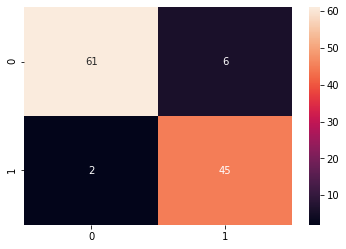

In [110]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d")
print(classification_report(y_test, y_pred))

In [111]:
y_pred.shape

(114,)

In [120]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))


In [125]:
X2.ravel().shape

(5216332,)

In [126]:
classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape).shape

(2266, 2302)

In [127]:
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.colors

# z = np.exp(-X1**2-X2**2)*1.5+0.2

# colors = ["red", "blue"]
# cmap= matplotlib.colors.ListedColormap(colors)
# boundaries=[z.min(), 0.35, 0.7, 1.05, 1.4, z.max()]

# m = plt.contourf(X1, X2, z, levels = boundaries, cmap=cmap)

# plt.colorbar(m, spacing="proportional")
# plt.show()

ValueError: could not convert string to float: 'B'

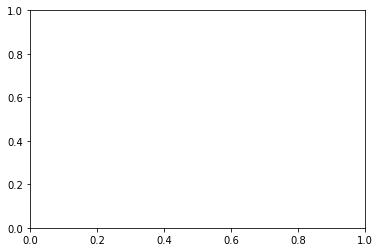

In [118]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), cmap = ListedColormap(("red","blue")))



In [ ]:
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show(

ValueError: could not convert string to float: 'B'

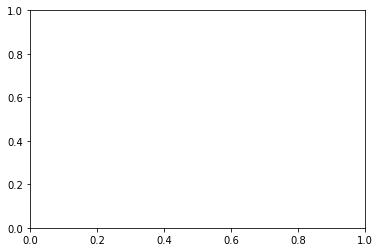

In [43]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()